# Understanding Logistic Regression

Logistic Regression is a statistical method used for binary classification. It's an extension of linear regression, but instead of predicting continuous values, it is used to predict a binary outcome (1/0, Yes/No, True/False). The core idea is to find a relationship between features and the probability of a particular outcome.

This is done by using the logistic function (also known as the sigmoid function), which maps any input value into a value between 0 and 1, representing the probability. This model is particularly useful in cases where there is a need to estimate the likelihood of a binary outcome based on one or multiple predictor variables.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine
from IPython.display import display
from sklearn.metrics import confusion_matrix

In [2]:
wine_data = load_wine()
X = wine_data.data
y = (wine_data.target == 0).astype(int)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=40)

## Visualizations

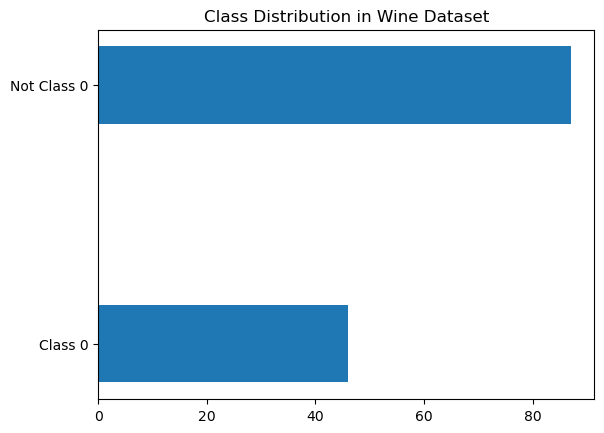

In [3]:
# Class Distribution
plt.barh(['Class 0','Not Class 0'], [sum(y_train), len(y_train) - sum(y_train)], height=0.3)
plt.title('Class Distribution in Wine Dataset')
plt.show()

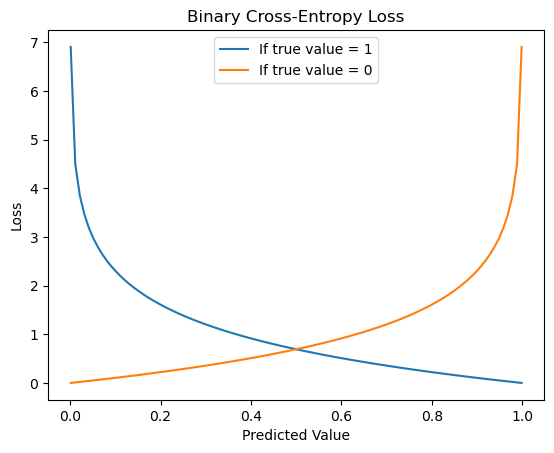

In [4]:
# Binary Cross-Entropy Loss Function
plt.plot(np.linspace(0.001, 0.999, 100), [-np.log(i) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [-np.log(1 - i) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Define Functions

In [5]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def loss_function(X, y, weights):
    h = sigmoid(X, weights)
    m = y.shape[0]
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(X, h, y):
    m = y.shape[0]
    return 1/m * np.dot(X.T, (h - y))

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

class MY_LogisticRegression:
    def __init__(self):
        self.weights = None
        self.loss = []

    def fit(self, X, y, epochs=25, lr=0.05):        
        self.weights = np.zeros(X.shape[1])
        for _ in range(epochs):        
            y_hat = sigmoid(X, self.weights)
            gradient = gradient_descent(X, y_hat, y)
            self.weights = update_weight_loss(self.weights, lr, gradient)
            self.loss.append(loss_function(X, y, self.weights))

    def predict(self, X):        
        z = sigmoid(X, self.weights)
        return [1 if i > 0.5 else 0 for i in z]

## Train Model

In [6]:
model = MY_LogisticRegression()
model.fit(X_train, y_train, epochs=100, lr=0.05)
y_pred = model.predict(X_test)

## Model Evaluation and Error Analysis

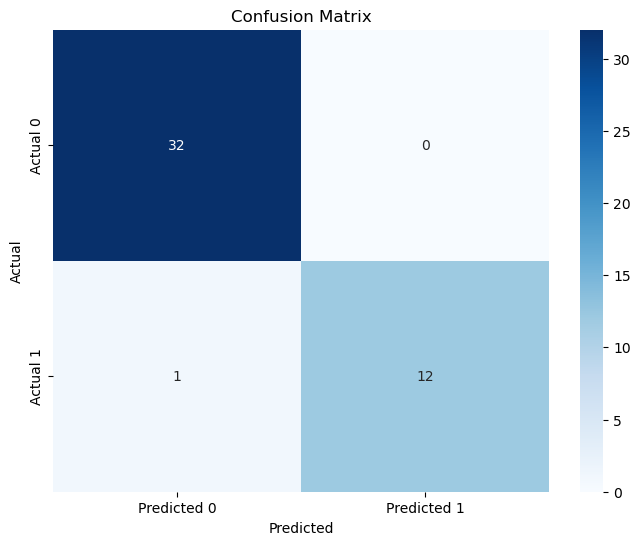

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [8]:
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict)

display(accuracy)
display(report_df)

0.9777777777777777

,0,1,accuracy,macro avg,weighted avg
precision,0.969697,1.000000,0.977778,0.984848,0.978451
recall,1.000000,0.923077,0.977778,0.961538,0.977778
f1-score,0.984615,0.960000,0.977778,0.972308,0.977504
support,32.000000,13.000000,0.977778,45.000000,45.000000


In [9]:
# Calculate false positives, false negatives, true positives, true negatives
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Calculate and print the rates
TPR = TP/(TP+FN)  # Sensitivity, hit rate, recall, or true positive rate
TNR = TN/(TN+FP)  # Specificity or true negative rate
PPV = TP/(TP+FP)  # Precision or positive predictive value
NPV = TN/(TN+FN)  # Negative predictive value

print("True Positive Rate:", TPR)
print("True Negative Rate:", TNR)
print("Positive Predictive Value:", PPV)
print("Negative Predictive Value:", NPV)

True Positive Rate: [1.         0.92307692]
True Negative Rate: [0.92307692 1.        ]
Positive Predictive Value: [0.96969697 1.        ]
Negative Predictive Value: [1.         0.96969697]


The logistic regression model has shown excellent performance on the test data. The confusion matrix indicates a high number of true positives (32) and true negatives (12), with very few false negatives (1) and no false positives. This suggests that the model is very effective at predicting Class 0 correctly and is highly reliable at identifying instances that are not Class 0 without making many mistakes.

The accuracy of the model is approximately 97.78%, which is outstanding. This high accuracy is corroborated by the precision and recall values, which are 96.97% and 100% for Class 0, and 100% and 92.31% for Class 1, respectively. These high values indicate that the model has a high rate of correctly predicting positive instances as positive (precision) and a high rate of correctly identifying all positive instances (recall).

Furthermore, the F1-score, which is the harmonic mean of precision and recall, stands at 0.9846 for Class 0 and 0.9600 for Class 1, reflecting a balanced performance between precision and recall. The weighted average scores across these metrics also confirm the model's strong overall performance.

In summary, the model demonstrates robust predictive capabilities, making it a potentially valuable tool for applications where accurate classification of Class 0 is critical.

## Cross-validation

Cross-validation is a statistical method used to estimate the skill of machine learning models. It is used to protect against overfitting in a predictive model, particularly when the dataset is not large. The procedure involves dividing the dataset into a set number of "folds", typically five or ten. Each fold acts as a testing set on which the model is evaluated while it is trained on the remaining folds.

In [10]:

from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

# Modify MY_LogisticRegression to inherit from sklearn's BaseEstimator and ClassifierMixin
class MY_LogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.05, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.loss = []

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            y_hat = sigmoid(X, self.weights)
            gradient = gradient_descent(X, y_hat, y)
            self.weights = update_weight_loss(self.weights, self.lr, gradient)
            self.loss.append(loss_function(X, y, self.weights))
        return self

    def predict(self, X):
        z = sigmoid(X, self.weights)
        return [1 if i > 0.5 else 0 for i in z]

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(MY_LogisticRegression(lr=0.05, epochs=100), X_scaled, y, cv=5)

# Print cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())


Cross-validation scores: [0.91666667 0.94444444 0.94444444 0.85714286 1.        ]
Mean cross-validation score: 0.9325396825396826


The logistic regression model demonstrates robust performance with a high mean cross-validation score of approximately 93.25%, affirming its strong generalization across different data subsets. The model's consistent accuracy and balanced precision-recall metrics indicate effective classification capabilities, particularly in reliably identifying negative outcomes, which is crucial for conditions where failing to detect a 'Class 0' instance carries significant consequences. The cross-validation results, coupled with high predictive values, suggest that the model is well-calibrated without apparent overfitting or underfitting, making it a dependable tool for practical applications related to this dataset.

# Conclusion

The model has demonstrated a high level of precision and recall, particularly in identifying the crucial 'Class 0' instances accurately. This balance between precision and recall suggests that the model is effective at predicting positive instances and also at capturing the majority of positive instances without many false negatives.

Furthermore, the consistency of the performance across different folds in the cross-validation process indicates that the model is well-calibrated and not prone to overfitting or underfitting. This is crucial for maintaining model reliability in practical scenarios.

In summary, the logistic regression model's strong performance metrics across accuracy, precision, recall, and F1-score, combined with its solid cross-validation results, make it a dependable option for binary classification problems, especially when the cost of misclassification is high. As such, it can be considered a valuable tool for making informed decisions in related applications.